# Introduction

## Advance Task 1 - Develop A Neural Network That Can Read Handwriting

**Name:** *Sriniketh J*

**Task:** *Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find <a href= "https://en.wikipedia.org/wiki/MNIST_database">here</a>.*

## MNIST Data
**MNIST is ‘Modified National Institute of Standards and Technology’. This database consists of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems. This is considered to be the ‘Hello World program in ML’ which involves Deep Learning.**

# 1. Importing Dataset

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

data = mnist.load_data()

In [2]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# 2. Split the Dataset into Test and Train

In [3]:
(X_train, y_train), (X_test, y_test) = data

## Data Visualisation

### Colored Image

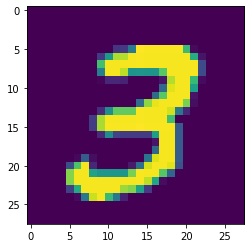

In [4]:
plt.imshow(X_train[7])

### Gray Scale Image

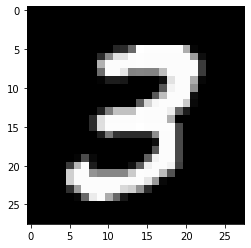

In [5]:
plt.imshow(X_train[7], cmap = 'gray')
plt.show()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [9]:
X_train = X_train / 255
X_test = X_test / 255

# 3. Model Building

In [10]:
from keras.utils import np_utils

print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

(10000,)
(10000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

## Building a Sequential and Dense Model with Relu and Softmax as activation functions.

In [12]:
model = Sequential()

model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation  = 'softmax'))

In [13]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


# 4. Train the model

In [15]:
model.fit(X_train, y_train, epochs= 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.7987 - accuracy: 0.7646
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9390
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1514 - accuracy: 0.9555
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.9626
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1073 - accuracy: 0.9686
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0912 - accuracy: 0.9726
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9762
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9785
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9800
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0612 - accuracy: 0.9813

# 5. Predicting Accuracy

In [16]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9693
Accuracy:  96.92999720573425
